# PREPAREM LES DADES 

Carreguem les llibreries que necessitem

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import networkx as nx
from sklearn import preprocessing

Assignem noms de columnes 
i Llegim les dades de la url a un dataframe de pandas i el mostrem

In [2]:
import requests
import io

In [3]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
s=requests.get(url).content
dataset=pd.read_csv(io.StringIO(s.decode('utf-8')),names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Separem les característiques (columnes x) de les classes (columna y) Per x agafem només 2 columnes  

In [4]:
X = dataset.iloc[:, 0:2].values  
y = dataset.iloc[:, 4].values  
print(X.shape)
print(y.shape)

(150, 2)
(150,)


Traiem duplicats

In [5]:
dup=np.unique(X,return_index=True,axis=0)
X=X[dup[1],:]
y=y[dup[1]]
print(X.shape)
print(y.shape)

(116, 2)
(116,)


Seleccionem a l'atzar les files que suposem classificades i retenim la resta que considerem no classificades

In [6]:
from sklearn.model_selection import train_test_split
import random
random.seed(111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape
num_objectes_train=X_train.shape[0]
num_objectes_test=X_test.shape[0]
print(num_objectes_train)
print(num_objectes_test)

87
29


Dibuixem els nostres exemples amb diferents colors segons la classificació

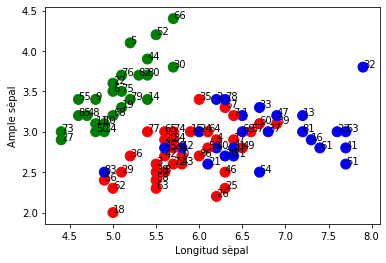

In [7]:
colors = {'Iris-versicolor':'red', 'Iris-virginica':'blue', 'Iris-setosa':'green'}
cols = [colors[i] for i in y_train]
plt.scatter(X_train[:,0],X_train[:,1] , c=cols, s=100)
plt.xlabel("Longitud sèpal")
plt.ylabel("Ample sèpal")
for i, txt in enumerate(range(num_objectes_train)):
    plt.annotate(txt, (X_train[i,0],X_train[i,1]))


# COMENCEM LA CLASSIFICACIÓ D'UN NOU EXEMPLE (EL PRIMER del conjunt de test)

Afegim el punt a classificar

In [8]:
X_clas = np.append(X_train, X_test[0:1,:],axis=0)

Tornem a fer el gràfic amb aquest punt en color groc

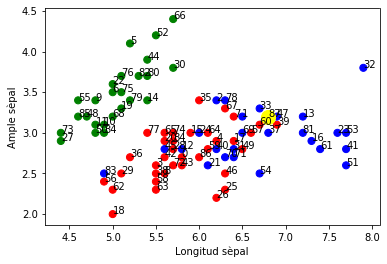

In [9]:
colors = {'Iris-versicolor':'red', 'Iris-virginica':'blue', 'Iris-setosa':'green'}
cols = [colors[i] for i in y_train]
plt.scatter(X_train[:,0],X_train[:,1] , c=cols, s=50)
plt.scatter(X_test[0,0],X_test[0,1], c='yellow',s=200)
plt.xlabel("Longitud sèpal")
plt.ylabel("Ample sèpal")
for i, txt in enumerate(range(num_objectes_train+1)):
    plt.annotate(txt, (X_clas[i,0],X_clas[i,1]))


Estandaritzem les 2 variables del X_clas

In [83]:
X_clas=preprocessing.scale(X_clas)
X_clas[0:5,]

array([[-1.73891644,  0.37013229],
       [ 0.31510566, -0.55388591],
       [-0.82601773,  2.44917324],
       [-1.16835474,  0.13912774],
       [-0.94013007,  1.06314594]])

Fem la matriu de distàncies

In [84]:
dist=np.zeros(shape=(num_objectes_train+1,num_objectes_train+1), dtype=float)
for i in range(num_objectes_train+1):
    for j in range(num_objectes_train+1):
            dist[i,j]=np.sqrt(np.sum((X_clas[i,:]-X_clas[j,:])**2))
print(dist)

[[0.         2.25229137 2.27063765 ... 1.40432803 2.1487344  0.82597272]
 [2.25229137 0.         3.21255768 ... 2.4285856  0.11411234 1.9483803 ]
 [2.27063765 3.21255768 0.         ... 0.93103773 3.17381725 1.63305802]
 ...
 [1.40432803 2.4285856  0.93103773 ... 0.         2.3716184  0.70234574]
 [2.1487344  0.11411234 3.17381725 ... 2.3716184  0.         1.86994342]
 [0.82597272 1.9483803  1.63305802 ... 0.70234574 1.86994342 0.        ]]


Passem la matriu de distàncies a similaritats 1/dist+1 (només per dibuixar el graf)

In [85]:
sim=1/(dist+1)

Grafiquem el graf (complet) amb la matriu d'adjacècncia com les similaritats

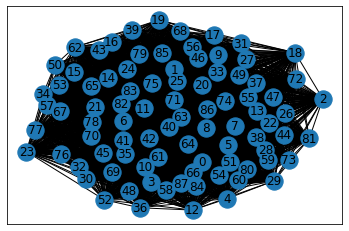

In [86]:
G1=nx.from_numpy_matrix(sim)
nx.draw_networkx(G1)

In [87]:
X_clas=preprocessing.scale(X_clas)
X_clas[0:5,]

array([[-1.73891644,  0.37013229],
       [ 0.31510566, -0.55388591],
       [-0.82601773,  2.44917324],
       [-1.16835474,  0.13912774],
       [-0.94013007,  1.06314594]])

Fixem el número de veins

In [88]:
K=4

Determinem els índex dels k més propers

In [89]:
dist_sort=dist.argsort(axis=1)[:,1:(K+1)]
dist_sort[0:5,]

array([[36, 52, 48, 81],
       [21, 86, 40, 78],
       [77, 72, 43, 18],
       [48, 42, 80, 61],
       [51, 87, 32, 66]])

A l'array anterior veiem que la observació 0 te com a 4 més propers el 36,52,48,81. Comprovem-ho amb les distàncies

In [90]:
dist[0,]

array([0.        , 2.25229137, 2.27063765, 0.61555158, 1.05751009,
       1.47223015, 1.99416707, 1.79142169, 2.18040594, 2.77739247,
       1.84554824, 2.39635912, 0.69301365, 1.74770261, 2.55262989,
       2.9444603 , 2.08217024, 3.11548033, 3.14403268, 4.01268268,
       2.56833539, 2.35682341, 1.55373974, 4.22759547, 2.60436842,
       2.28224678, 1.44518737, 2.86214593, 1.65194545, 1.62365025,
       2.23402222, 3.22837531, 0.6494601 , 2.6347302 , 1.9341094 ,
       1.80356637, 0.4620091 , 2.2939079 , 1.71473982, 3.68070609,
       2.46220633, 0.83151835, 0.73416146, 2.44284204, 2.11502018,
       2.10534064, 3.09116758, 2.1604661 , 0.51157513, 2.6347302 ,
       3.32607341, 0.97419015, 0.47589288, 3.8774167 , 2.03020355,
       2.70473639, 2.21681288, 3.54588113, 1.5347254 , 3.08273127,
       1.9713742 , 0.82597272, 3.79394294, 1.71168509, 2.38418153,
       2.96692082, 1.23110316, 3.19514549, 3.38104352, 2.11893986,
       2.55787567, 2.19441263, 1.97912976, 0.72259369, 2.05998

In [91]:
print(dist[0,[36,52,48,81]])

[0.4620091  0.47589288 0.51157513 0.51530468]


Creem la matriu d'adjacències amb mutual (pot ser que no tots 4 seran al 0 pel mutual)

In [95]:
adj=np.zeros(shape=(num_objectes_train+1,num_objectes_train+1), dtype=float)
for i in range(num_objectes_train+1):
   for j in range(K):
       if i in dist_sort[dist_sort[i,j],:]:
           adj[i,dist_sort[i,j]]=1

In [96]:
print(dist_sort[0,])

[36 52 48 81]


Veiem que el 48 no te el 0 com a un dels quatre més propers i per tant no al mutual graf no hi serà

In [98]:
print(dist_sort[36,])
print(dist_sort[52,])
print(dist_sort[48,])
print(dist_sort[81,])

[52 12  0 48]
[36 12  0 48]
[ 3 42 80 61]
[32 87 76 73]


Dibuixem el graf amb les adjacències

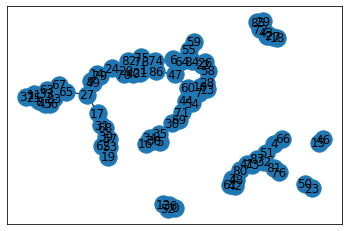

In [99]:
G2=nx.from_numpy_matrix(adj)
nx.draw_networkx(G2)

# Assignar la classe al nou exemple

Agafem de l'última fila (l'exemple que volem classificar) totes les columnes menys la última i ho convertim en bool (perquè seran indexos per mirar les classes dels exemples coneguts)

In [101]:
index_clas=adj[-1,:-1].astype(bool)
print(index_clas)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False]


Mirem quines són les classes dels que estan relacionats amb la nova observació i pensem com ho classificarà (segons la classe més freqüent)

In [102]:
y_train[index_clas]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

Classifiquem l'observació

In [104]:
if True in index_clas:
    u, c = np.unique(y_train[index_clas], return_counts=True)
    y_class=u[c.argmax()]
else:
    y_class='Unclassified'
print(y_class)

Iris-setosa


Mirem si ho ha fet bé

In [106]:
y_class==y_test[0]

True